In [1]:
library(tidyverse)
library(magrittr)
library(bipartite)
library(vegan)
library(RColorBrewer)
library(igraph)

source('Functions.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: sna
Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, Universi

In [2]:
Time=200
prefix="mu1e-7_initialDiffDp1_S10P15_R-12499"

In [3]:
bacteriaFile=paste(prefix,"_data-bact.txt",sep="")
virusFile=paste(prefix,"_data-phage.txt",sep="")
system(paste('python BuildNetworks_v12.py',virusFile,' ',bacteriaFile,' ',Time))

# Virus ProtoSpacer Acquisition 

In [4]:
argument = paste('Protospacers-by-virus_',prefix,'_Time_',Time,'.txt',sep="")
network = BuildNetwork(argument,'Ps_')

     Ps_0 Ps_1 Ps_2 Ps_24
V_11    1    1    1     1
V_13    1    1    1     0
V_14    1    1    1     0
V_41    1    1    1     0


Parsed with column specification:
cols(
  nodeID = col_integer(),
  nodeName = col_character()
)
Parsed with column specification:
cols(
  i = col_integer(),
  j = col_integer(),
  w = col_integer()
)
Parsed with column specification:
cols(
  nodeName = col_character(),
  group = col_integer()
)
Joining, by = "nodeName"


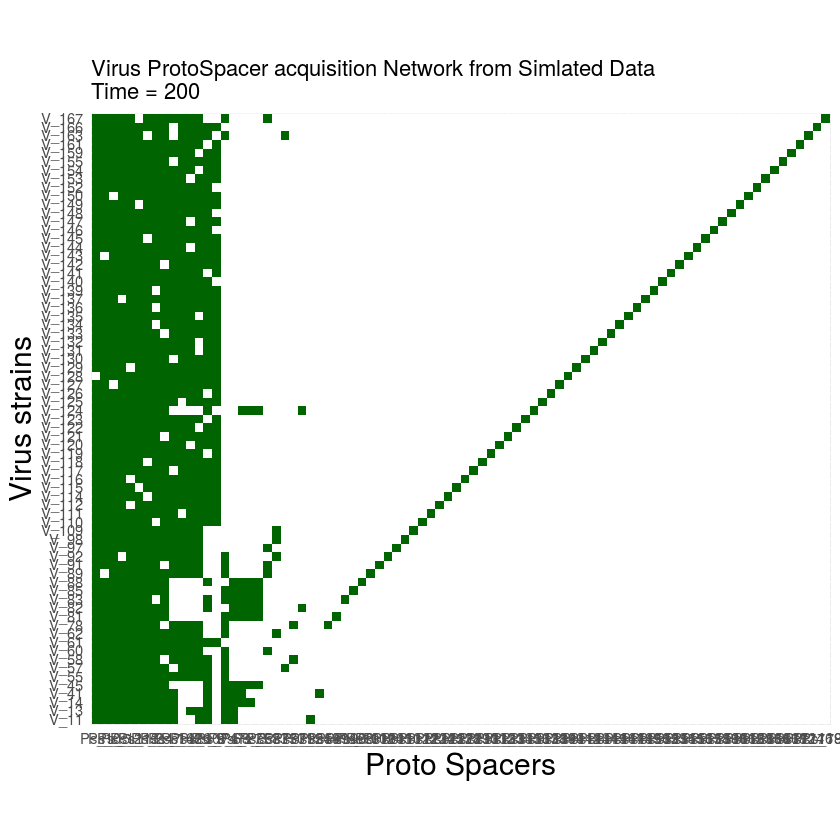

In [5]:
title = paste('Virus ProtoSpacer acquisition Network from Simlated Data','\n','Time = ',Time,sep="");
plot_matrix(network, layout = 'nested', method = 'ggplot', binary_cols = c('white','darkgreen'), title=title, x_title='Proto Spacers', y_title='Virus strains')+theme(legend.position = 'none');

## ProtoSpacer Acquisition Modularity


Parsed with column specification:
cols(
  path = col_character(),
  flow = col_double(),
  name = col_character(),
  node = col_integer()
)
Joining, by = "runningID"
Joining, by = "module"


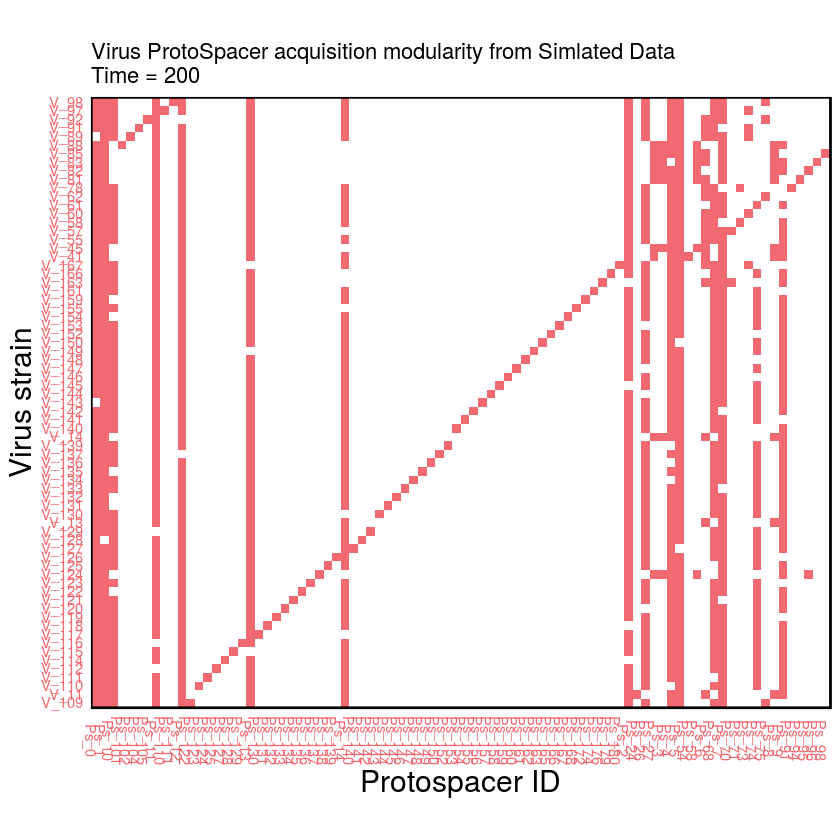

In [6]:
x <- Infomap_wrapper_NoShuffled(Z = network, bipartite_groups = c('ProtoSpacer','Virus'), file_prefix = prefix)
title = paste('Virus ProtoSpacer acquisition modularity from Simlated Data ','\n','Time = ',Time,sep="");
ggplot_bipartite_modules(Z=network, x$node_data_obs, module_numbers = F, color_tick_labels = Time, border=F, text_size = 18, title=title, xlab='Protospacer ID', ylab='Virus strain');

# Bacteria Spacer Acquisition 

In [7]:
argument = paste('Spacers-by-bacteria_',prefix,'_Time_',Time,'.txt',sep="")
network = BuildNetwork(argument,'Sp_')

    Sp_10 Sp_7 Sp_14 Sp_9
B_2     1    0     0    0
B_5     0    1     0    0
B_6     0    0     1    0
B_7     0    0     0    1


Parsed with column specification:
cols(
  nodeID = col_integer(),
  nodeName = col_character()
)
Parsed with column specification:
cols(
  i = col_integer(),
  j = col_integer(),
  w = col_integer()
)
Parsed with column specification:
cols(
  nodeName = col_character(),
  group = col_integer()
)
Joining, by = "nodeName"


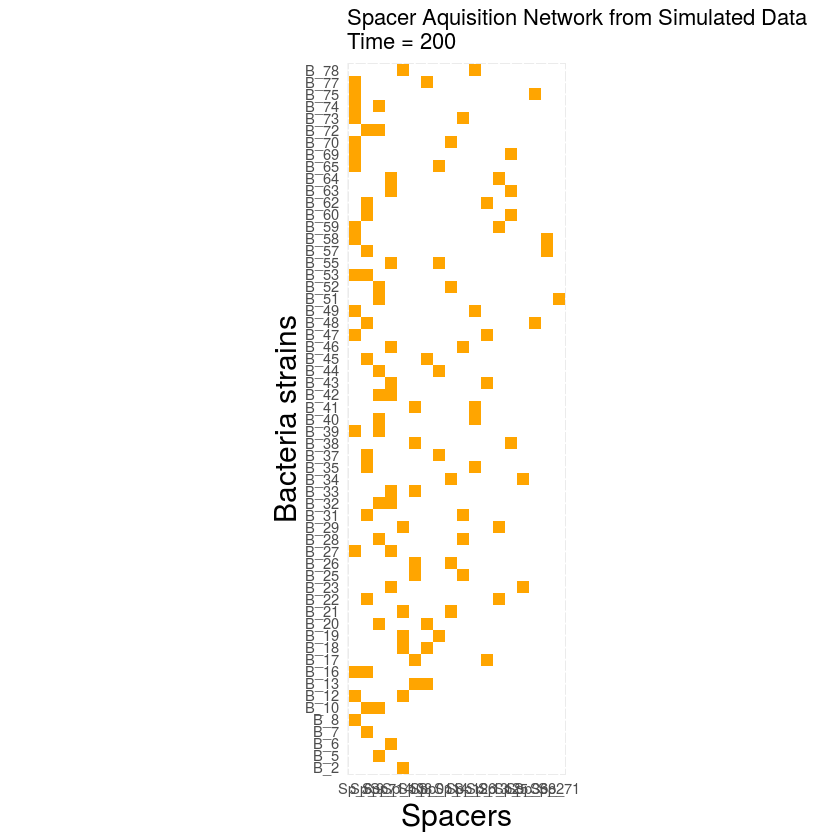

In [8]:
title = paste('Spacer Aquisition Network from Simulated Data','\n','Time = ',Time,sep="");
plot_matrix(network, layout = 'nested', method = 'ggplot', binary_cols = c('white','orange'), title=title, x_title='Spacers', y_title='Bacteria strains')+theme(legend.position = 'none');

## Spacer Acquisition Modularity

Parsed with column specification:
cols(
  path = col_character(),
  flow = col_double(),
  name = col_character(),
  node = col_integer()
)
Joining, by = "runningID"
Joining, by = "module"


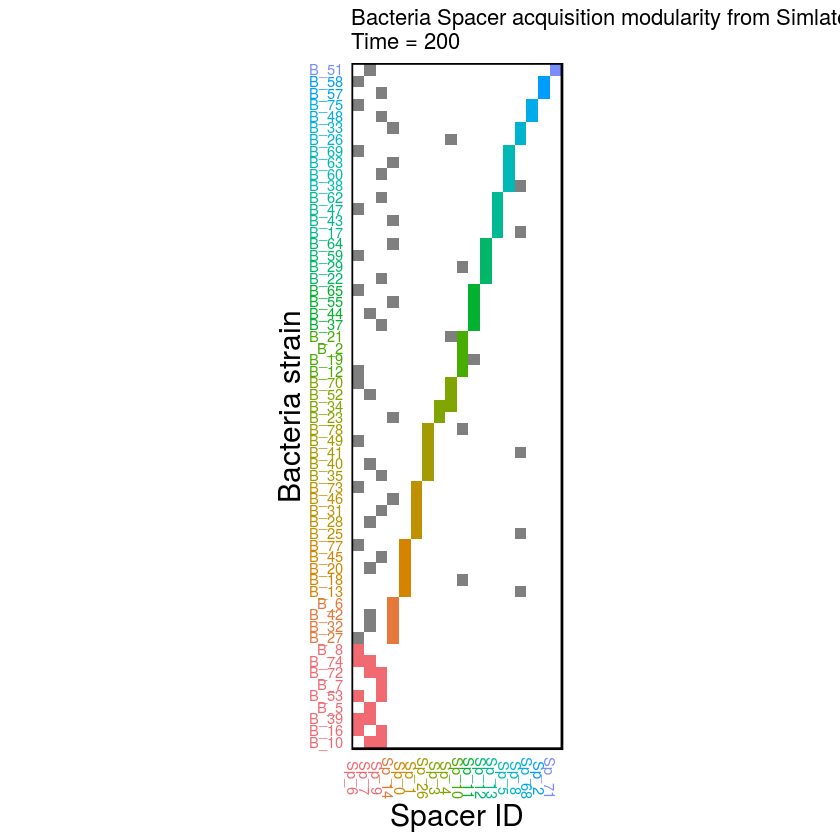

In [9]:
x <- Infomap_wrapper_NoShuffled(Z = network, bipartite_groups = c('Spacer','Bacteria'), file_prefix = prefix)
title = paste('Bacteria Spacer acquisition modularity from Simlated Data ','\n','Time = ',Time,sep="");
ggplot_bipartite_modules(Z=network, x$node_data_obs, module_numbers = F, color_tick_labels = T, border=F, text_size = 18, title=title, xlab='Spacer ID', ylab='Bacteria strain')

# Immunity Network

In [10]:
argument = paste('Bipartite_MATRIX_',prefix,'_Time_',Time,'.txt',sep="")
network = BuildBipartiteNetwork(argument)

     B_2 B_5 B_6 B_7
V_11   1   1   1   1
V_13   1   1   1   1
V_14   0   1   1   1
V_41   0   1   1   1


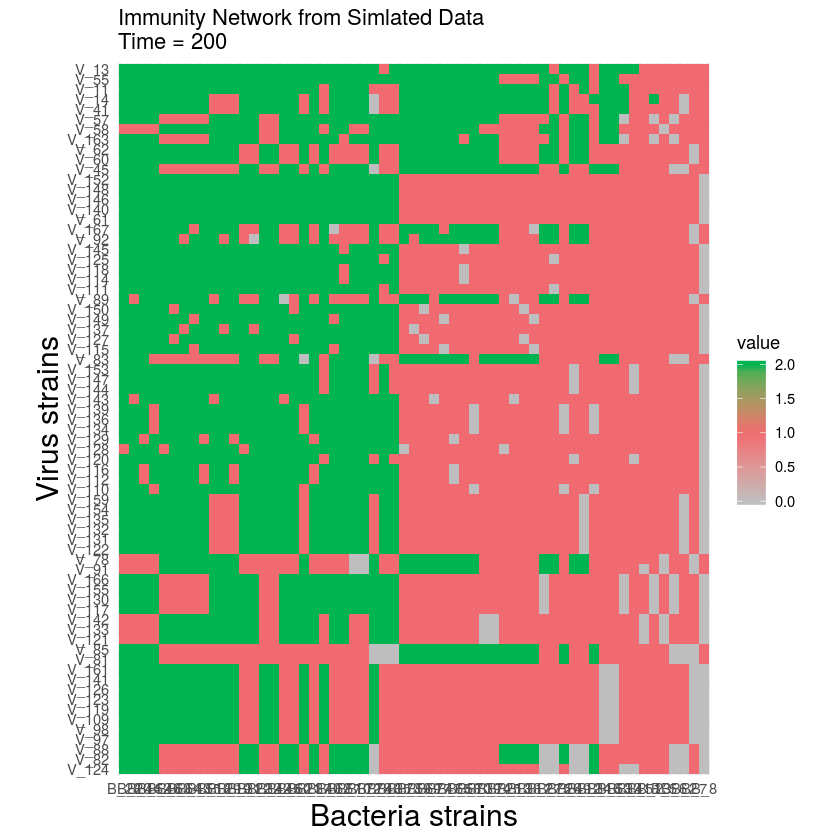

In [11]:
title = paste('Immunity Network from Simlated Data','\n','Time = ',Time,sep="");
plot_matrix(network, layout = 'nested', method = 'ggplot', title=title, x_title='Bacteria strains', y_title='Virus strains')

## Immunity Network Modularity

Parsed with column specification:
cols(
  path = col_character(),
  flow = col_double(),
  name = col_character(),
  node = col_integer()
)
Joining, by = "runningID"
Joining, by = "module"


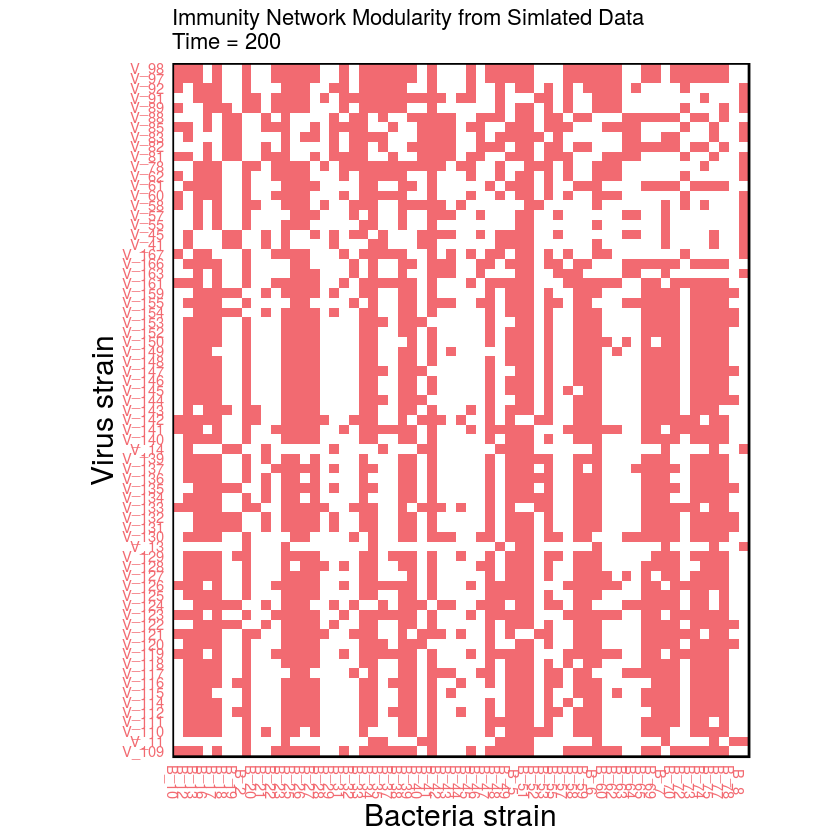

In [12]:
x <- Infomap_wrapper_NoShuffled(Z = network, bipartite_groups = c('Bacteria', 'Virus'), file_prefix = prefix)
title = paste('Immunity Network Modularity from Simlated Data ','\n','Time = ',Time,sep="");
ggplot_bipartite_modules(Z=network, x$node_data_obs, module_numbers = F, color_tick_labels = T, border=F, text_size = 18, title=title, xlab='Bacteria strain', ylab='Virus strain')

# Infection Network

In [13]:
argument = paste('BipartieInfection_MATRIX_',prefix,'_Time_',Time,'.txt',sep="")
network = BuildBipartiteNetwork(argument)

            B_2 B_5 B_6 B_7
V_11 0.00000000   0   0   0
V_13 0.00000000   0   0   0
V_14 9.76392165   0   0   0
V_41 0.02916878   0   0   0


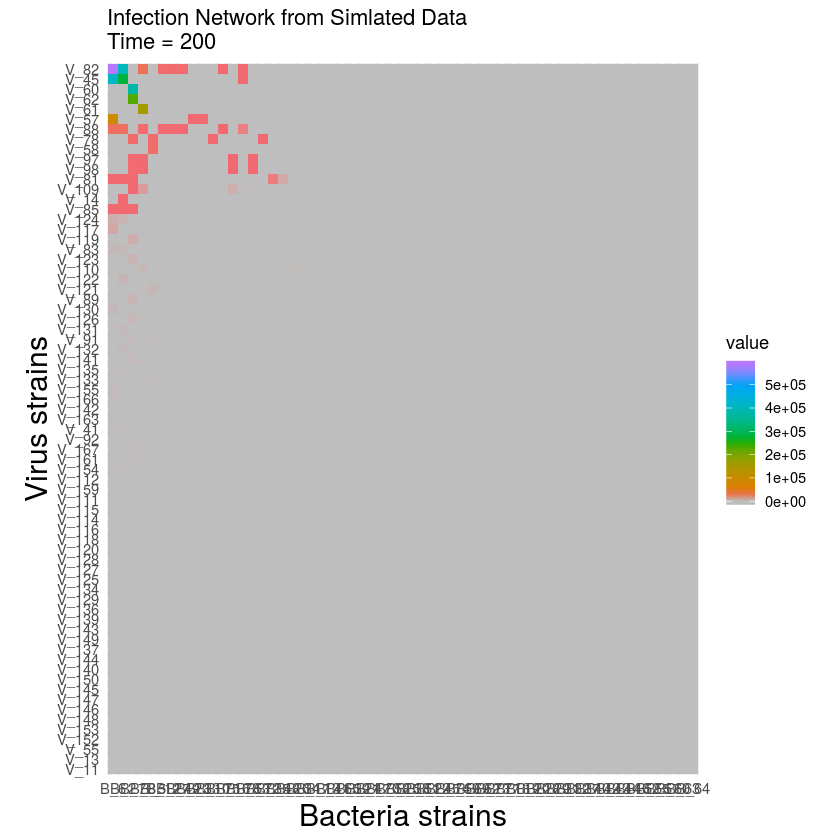

In [14]:
title = paste('Infection Network from Simlated Data','\n','Time = ',Time,sep="");
plot_matrix(network, layout = 'nested', method = 'ggplot', title=title, x_title='Bacteria strains', y_title='Virus strains')

## Infection Network Modularity

Parsed with column specification:
cols(
  path = col_character(),
  flow = col_double(),
  name = col_character(),
  node = col_integer()
)
Joining, by = "runningID"
Joining, by = "module"


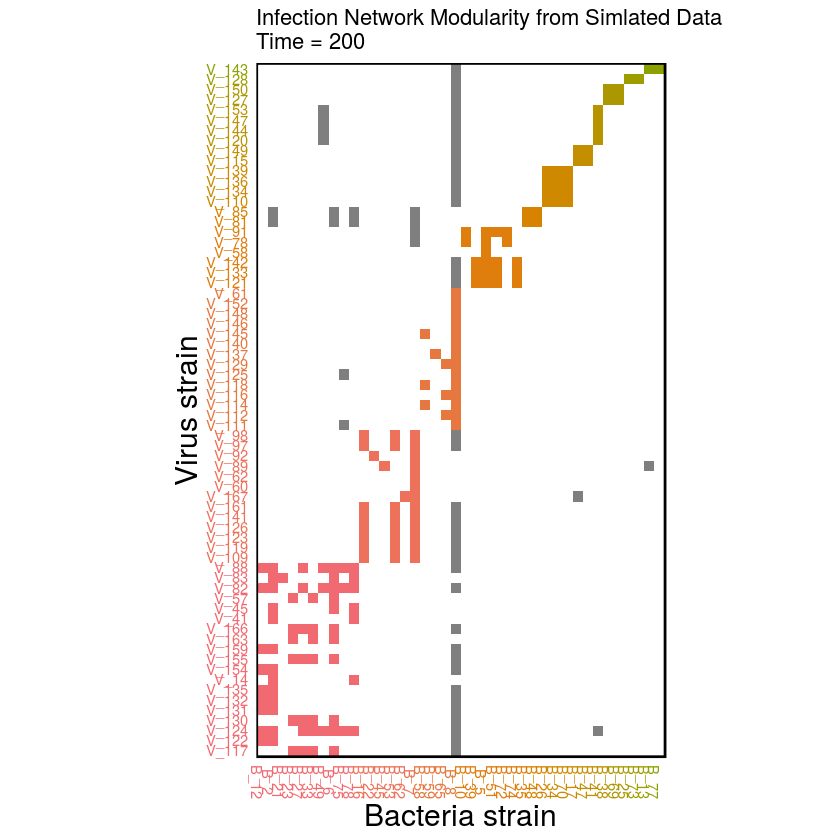

In [15]:
x <- Infomap_wrapper_NoShuffled(Z = network, bipartite_groups = c('Bacteria', 'Virus'), file_prefix = prefix)
title = paste('Infection Network Modularity from Simlated Data  ','\n','Time = ',Time,sep="");
ggplot_bipartite_modules(Z=network, x$node_data_obs, module_numbers = F, color_tick_labels = T, border=F, text_size = 18, title=title, xlab='Bacteria strain', ylab='Virus strain', weighted=T)

In [16]:
system('rm *Time_*.txt')
system('rm *_Infomap.*')